# Interpolation

In [5]:
# Import modules
import sys
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg

In [21]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.bbox'] = 'tight'

## Newton's divided differences

In [2]:
def newton_divided_diff(X, Y, n):
    V = {}
    for j in range(n):
        V[j, 0] = Y[j]
    
    for i in range(1,n):
        for j in range(n-i):
            V[j, i] = (V[j+1, i-1] - V[j, i-1]) / (X[j+i] - X[j])
    
    C = np.zeros(n)
    for i in range(n):
        C[i] = V[0,i]
    
    return C

### Example
Use Newton's divided differences to find the interpolating polynomial passing through (0,1),(2,2),(3,4)

In [3]:
X = [0, 2, 3]
Y = [1, 2, 4]
C = newton_divided_diff(X, Y, 3)
print(C)

[1.  0.5 0.5]


$$
P(x) = 1 + 0.5(x - 0) + 0.5(x - 0)(x - 2)
$$

In [18]:
p = lambda x : 1 + (0.5 * (x - 0)) + (0.5 * (x - 0) * (x - 2))
x = np.linspace(-5,5,100)
y = p(x)

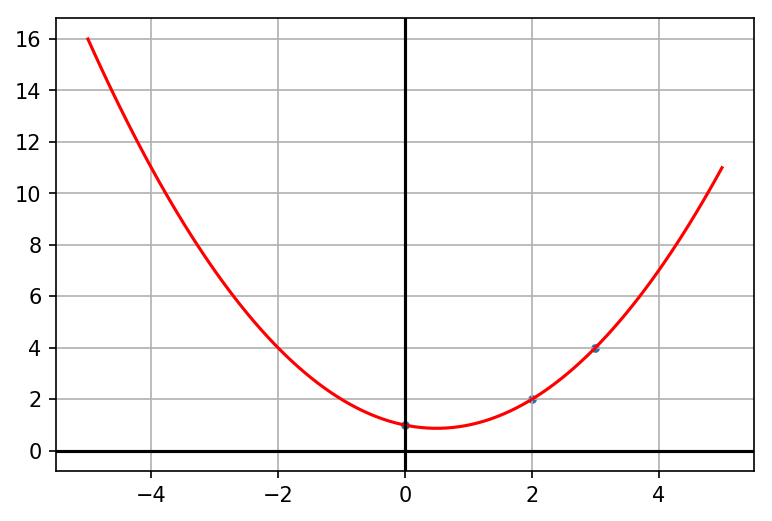

In [23]:
plt.scatter(X, Y, s=10)
plt.plot(x, y, color='r')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

## Bézier Curves

In [24]:
def bezier_curve(X, Y):
    """
    Make the function handle of the bezier curve formula
    
    Args:
        X - x-axis points (include endpoints and control points)
        Y - y-axis points (include endpoints and control points)
        
    Returns:
        fx - bezier curve for x-axis points
        fy - bezier curve for y-axis points
    """
    x1 = X[0]
    x2 = X[1]
    x3 = X[2]
    x4 = X[3]
    y1 = Y[0]
    y2 = Y[1]
    y3 = Y[2]
    y4 = Y[3]
    
    bx = 3 * (x2 - x1)
    cx = 3 * (x3 - x2) - bx
    dx = x4 - x1 - bx - cx
    by = 3 * (y2 - y1)
    cy = 3 * (y3 - y2) - by
    dy = y4 - y1 - by - cy
    
    fx = lambda t : x1 + bx * t + cx * pow(t, 2) + dx * pow(t, 3)
    fy = lambda t : y1 + by * t + cy * pow(t, 2) + dy * pow(t, 3)
    
    return fx, fy

### Example
Find the Bézier curve $(x(t),y(t))$ through the points $(x,y) = (1,1)$ and $(2,2)$ with control points $(1,3)$ and $(3,3)$

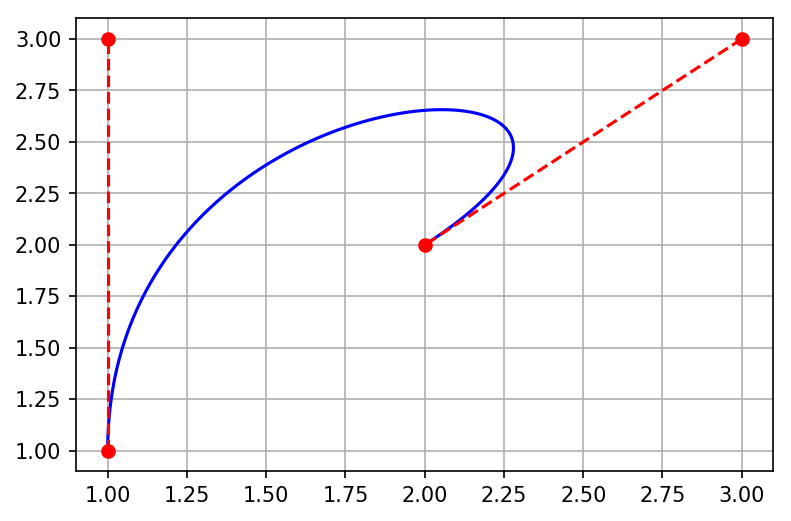

In [25]:
X = np.array([1, 1, 3, 2])
Y = np.array([1, 3, 3, 2])
fx, fy = bezier_curve(X, Y)

t = np.linspace(0, 1, 100)
px = fx(t)
py = fy(t)

plt.plot(px, py, color='b')
plt.plot(X[0:2], Y[0:2], color='r', marker='o', linestyle='--')
plt.plot(X[2:4], Y[2:4], color='r', marker='o', linestyle='--')
plt.grid(True)
plt.show()